In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 读取投资成本的分布
inv_cost = pd.read_excel('inv_cost.xlsx', header=[0], index_col=0)
inv_cost_list = inv_cost.loc['SMR':'SESS', '20':'70'].values


In [6]:
inv_cost_list.shape

(4, 6)

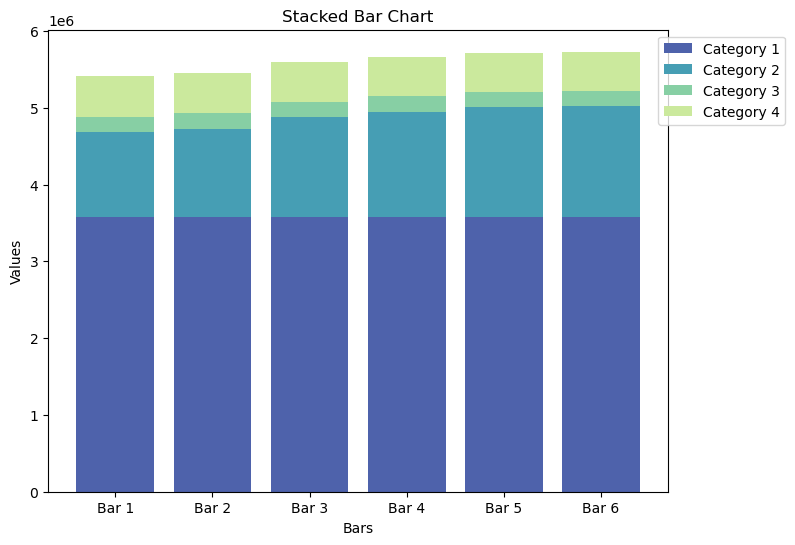

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个4x6的示例数据，你可以替换成你的数据
data = inv_cost_list

# 设置类别和颜色
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
colors = ['#4E62AB', '#469EB4', '#87CFA4', '#CBE99D', '#F5FBB1', '#FEE89A']

# 创建柱状堆积图
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.8
bar_positions = np.arange(data.shape[1])

bottom = np.zeros(data.shape[1])

for i in range(data.shape[0]):
    ax.bar(bar_positions, data[i], bar_width, label=categories[i], color=colors[i], bottom=bottom)
    bottom += data[i]

# 设置横坐标标签
ax.set_xticks(bar_positions)
ax.set_xticklabels([f'Bar {i+1}' for i in range(data.shape[1])])

# 设置图例
ax.legend(categories, loc='upper right', bbox_to_anchor=(1.2, 1))

# 设置标签
ax.set_xlabel('Bars')
ax.set_ylabel('Values')
ax.set_title('Stacked Bar Chart')

# 显示图形
plt.show()

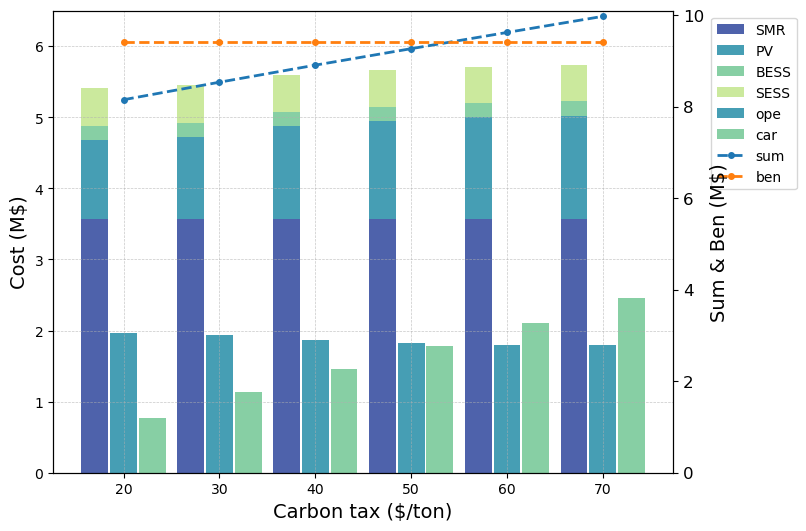

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取carbon_cost.xlsx文件
df = pd.read_excel('carbon_cost.xlsx', header=[0], index_col=0)
carbon_list = ['20', '30', '40', '50', '60', '70']
cost_list = ['ope', 'car', 'sum', 'ben']
data = df.loc['ope':'car', '20':'70'].values
sum_cost = df.loc['sum', '20':'70'].values
bench_cost = df.loc['ben', '20':'70'].values
tax_value = len(carbon_list)
data = data / 1e6
sum_cost = sum_cost / 1e6
bench_cost = bench_cost / 1e6

# 读取inv_cost.xlsx文件，这里要根据实际文件结构修改
inv_cost_df = pd.read_excel('inv_cost.xlsx', header=[0], index_col=0)
inv_cost_list = inv_cost_df.loc['SMR':'SESS', '20':'70'].values / 1e6
categories = ['SMR', 'PV', 'BESS', 'SESS']

# 设置画布大小
fig, ax1 = plt.subplots(figsize=(8, 6))

# 设置类别宽度和间隔
bar_width = 0.28
space_width = 0.02

# 计算X轴位置
x = np.arange(tax_value)
bar_positions = x - (bar_width + space_width) * (inv_cost_list.shape[0] - 1) / 2  # 初始位置

# 改颜色组合
colors = ['#4E62AB', '#469EB4', '#87CFA4', '#CBE99D', '#F5FBB1', '#FEE89A']
bottom = np.zeros(inv_cost_list.shape[1])
for i in range(inv_cost_list.shape[0]):
    ax1.bar(x - (bar_width + space_width), inv_cost_list[i], color=colors[i], width=bar_width, label=categories[i], bottom=bottom)
    bottom += inv_cost_list[i]

bottom = np.zeros(inv_cost_list.shape[1])
# 绘制其他成本的柱状堆积，堆积在投资成本上面
for i in range(data.shape[0]):
    ax1.bar(x + i * (bar_width + space_width), data[i], bar_width, label=cost_list[i], color=colors[i+1], bottom=bottom)
    

# bar_positions = x - (bar_width + space_width) * (data.shape[0] - 1) / 2  # 初始位置
    
# 添加网格线
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# 绘制线图
ax2 = ax1.twinx()  # 创建一个新的Y轴，共享相同的X轴
ax2.plot(x, sum_cost, '--', marker='o', markersize=4, linewidth=2, label='sum')
ax2.plot(x, bench_cost, '--', marker='o', markersize=4, linewidth=2, label='ben')

# 设置Y轴范围
ax1.set_ylim(0, 6.5)
ax2.set_ylim(0, 10.1)

# 设置Y轴标签
ax1.set_ylabel('Cost (M$)', fontsize=14)
ax2.set_ylabel('Sum & Ben (M$)', fontsize=14)

# 调整横纵坐标、标签的大小
plt.xticks(x, carbon_list, fontsize=12)
plt.yticks(fontsize=12)
ax1.set_xlabel('Carbon tax ($/ton)', fontsize=14)

# 将图例放在坐标轴外面
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=10, bbox_to_anchor=(1.05, 1))

# 显示图形
plt.show()

In [ ]:
# 换一个配色